## wine quality, linear regression exercise 4

### by lauri solin

I will probably inspect wine alcohol percent because it is probably ratio scale variable, (similar to an interval scale, but there exists also absolute zero such as zero percent alcohol content)

POSSIBLY, if you wanted to use wine quality as the response variable, then maybe you would have to use one-hot encoding for the 0-10 scale. (???)

If that wine quality is on 0-10 scale, it could possibly be ordinal response variable.
I read about that description about the dataset and wine quality, and they just said that
they use the median of three wine experts's judgements as the score.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

## GOOD TIP FOR DATA PREPROCESSING!
* open the csv file inside notepad, and look what is the decimal separator
* often times it is either dot or comma, in this case it looked to be dot decimal
* column separator was semi-colon
* if you want to be paranoid about the decimal dot/comma, you can open that csv inside excel also and then replace those dots with commas (or vice versa)

In [2]:
df = pd.read_csv('C:\\Users\\Lauri\\Documents\\HealthTechnology Mathematics&Methods\\winequality-red.csv', decimal='.',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#check if there are NaNs
df.isnull().values.any()

False

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## data preprocessing

* drop wine quality column as it is not being used in analysis(alcohol percent only)
* shuffle datapoints
* get training set and test sets
* normalize data based on training set statistical markers (avoid information leakage between sets)
* get the input columns into X and output column into Y
* get input and output for both training & test sets

In [6]:
df.drop('quality', axis=1, inplace=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:

#shuffle datapoints
df = shuffle(df)

#put into training & test sets
# about 38% for trainging
# about 62% for testing
training_data= df[:600]
test_data = df[600:]


In [8]:


    #normalize based on TRAINING_SET statistical markers, to avoid information leakage between sets
"""
mean = training_data.mean(axis = 0)
std = training_data.std(axis = 0)
training_data -= mean
training_data /= std
test_data -= mean
test_data /= std
"""

#get input and output data 
X_tra = training_data.iloc[:,0:10] #10xinput columns
Y_tra = training_data.iloc[:,10] #1xoutput column
print(X_tra)
print(Y_tra)

#get those datas into storage for both training & test sets just to be sure
X_test = test_data.iloc[:,0:10] #10xinput columns
Y_test = test_data.iloc[:,10] #1xoutput column

#print(X_test)
#print(Y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
127             8.1             1.330         0.00            1.80      0.082   
602             7.7             0.835         0.00            2.60      0.081   
1534            6.6             0.560         0.14            2.40      0.064   
259            10.0             0.310         0.47            2.60      0.085   
1105            6.3             0.570         0.28            2.10      0.048   
1222            8.1             0.530         0.22            2.20      0.078   
658             7.2             0.520         0.07            1.40      0.074   
398            11.5             0.590         0.59            2.60      0.087   
1525            6.7             0.480         0.08            2.10      0.064   
442            15.6             0.685         0.76            3.70      0.100   
272            10.9             0.370         0.58            4.00      0.071   
1367            6.9         

## Build model and fitting and printouts of results

In [9]:
# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X_tra,Y_tra)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred_tra = reg.predict(X_tra)
#Y_pred_tra = pd.Series(Y_pred_tra) #put into series form just to be sure

# compute error statistics
mse = mean_squared_error(Y_tra, Y_pred_tra)
r2s = r2_score(Y_tra, Y_pred_tra) 
print("MSE = ", mse)
print("R2s = ", r2s)


#print(Y_tra)
residual = Y_tra  - Y_pred_tra
print(residual.isnull().values.any())

Coefficients: [ 5.43275917e-01  3.83099176e-01  6.51939669e-01  2.71434641e-01
 -1.73999008e+00 -3.49845827e-04 -3.56888418e-03 -6.15991149e+02
  3.72172908e+00  1.46095314e+00]
Intercept: 605.8548351973793
MSE =  0.3784652834643334
R2s =  0.6777787364426279
False


## Regression equation seems to be as follows 

* you have to take the coefficients AND the Y-intercept and match them with the correct explanatory variables, in the same order compared to dataframe columns, and sum up all the terms
* then, you just get output as the alcoholpercent, which is the sum of the explanatory variable each multiplied with its own coefficient
* the numeric values seem to change based on data randomization on each run, though

In [10]:
namelist = ['fA','vA','cA','rS','C','fSd','tSd','D','pH','Sul']
print("y-intercept was = " +str(reg.intercept_))
for i in range(10):
    print(namelist[i] + " = " + str(reg.coef_[i]) )
    


y-intercept was = 605.8548351973793
fA = 0.5432759165347977
vA = 0.3830991757999094
cA = 0.6519396692289317
rS = 0.27143464054907834
C = -1.739990082183821
fSd = -0.000349845827248451
tSd = -0.003568884176902765
D = -615.9911486004441
pH = 3.721729084010609
Sul = 1.4609531398433813


In [11]:
%%latex

$alcohol = 

\\ 582.6196649052995


\\+ 5.68659172*10^{-1} *  fixed acidity 

\\+ 2.95094427*10^{-1} * volatile acidity

\\+ 7.65493147*10^{-1} * citric acid

\\+ 2.95029343*10^{-1} * residual sugar

\\- 3.27574812*10^{-1} * chlorides

\\-4.41859927*10^{-3} * free sulfur dioxide

\\-1.10901580*10^{-3} * total sulfur dioxide

\\-6.68144938*10^{2} * density

\\+ 3.96227659*10^{0} *  pH

\\+ 1.11773533*10^{0} *  sulphates $


<IPython.core.display.Latex object>

In [12]:
print(residual)
print('\n')
print(Y_tra)
print('\n')
print(pd.Series(Y_pred_tra))
print('\n')
#print(Y_pred_tra.head())
Y_pred_tra = pd.Series(Y_pred_tra)

print(Y_pred_tra.isnull().values.any())
print( pd.Series(residual).isnull().values.any())
print(Y_tra.isnull().values.any())

0     -0.269517
1     -0.160906
2      0.164316
3      0.453853
4      1.381923
5      0.068681
6      0.199068
7      0.379132
8     -0.458700
9      1.427187
10    -0.453446
11     0.905579
12    -0.275055
13    -0.402368
14     0.728566
15    -0.560392
16     0.557399
17     0.331483
18    -0.623165
19     0.162108
20     0.225860
21     0.564848
22    -0.822812
23    -0.534593
24     0.137406
25     1.897287
26     0.211510
27     0.573521
28    -0.334573
29    -0.320503
         ...   
570   -1.053533
571   -0.076701
572   -0.304429
573   -0.076455
574    0.027965
575    0.343606
576    0.388080
577   -0.178552
578   -0.191337
579    0.394300
580    0.801173
581    0.160927
582   -0.029341
583    0.233397
584    0.880605
585    1.003135
586   -0.560392
587   -0.209002
588   -0.257464
589    0.810524
590   -0.666782
591   -0.294732
592   -0.016892
593    0.208417
594    0.541023
595   -0.690826
596   -0.035210
597   -0.331951
598   -0.167670
599    0.360005
Name: alcohol, Length: 6

## for some reason the code below has NaN values from  the earlier linear regression(???) OR from the DataFrame construction (???)

### EDIT1:after debuggin with print statements, the bug seems to be in the dataframe creation, the new df2 dataframe below

### EDIT2: the example code from stackloss could not be adapted readily, and using that code the row size actually increased from 600 to about 900 !
### EDIT3: I googled stack overflow and some other person had same problem that concatenate created new NaN values into the data https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
### EDIT4: I used .reset_index(drop=True, inplace=True) which seemed to fix pd.concat bug, there is no longer any NaN values generated from concatenate

In [13]:
# merge observed and predicted values and compute residuals
s1=pd.Series(Y_tra)
s1.reset_index(drop=True, inplace=True)
s2=pd.Series(Y_pred_tra)
s2.reset_index(drop=True, inplace=True)
s3=pd.Series(residual)
s3.reset_index(drop=True, inplace=True)

df3=pd.DataFrame(s1)
df3.reset_index(drop=True, inplace=True)
df3['Y_pred_tra']=s2
df3.reset_index(drop=True, inplace=True)
df3['residual']=s3
df3.reset_index(drop=True, inplace=True)

print(s1.isnull().values.any())
print(s2.isnull().values.any())
print(s3.isnull().values.any())
print(df3.isnull().values.any())
print(df3)



"""
df2= pd.concat([Y_tra, pd.Series(Y_pred_tra), pd.Series(Y_tra-Y_pred_tra)], axis=1)
print(df2)
print(df2.isnull().values.any())
"""




False
False
False
False
     alcohol  Y_pred_tra  residual
0       10.9   11.169517 -0.269517
1        9.3    9.460906 -0.160906
2       11.7   11.535684  0.164316
3       10.5   10.046147  0.453853
4       12.8   11.418077  1.381923
5        9.6    9.531319  0.068681
6        9.6    9.400932  0.199068
7       11.0   10.620868  0.379132
8        9.7   10.158700 -0.458700
9       11.2    9.772813  1.427187
10      10.1   10.553446 -0.453446
11      10.5    9.594421  0.905579
12       9.2    9.475055 -0.275055
13       9.8   10.202368 -0.402368
14      10.7    9.971434  0.728566
15       9.5   10.060392 -0.560392
16      11.0   10.442601  0.557399
17      10.5   10.168517  0.331483
18       9.4   10.023165 -0.623165
19       9.3    9.137892  0.162108
20       9.6    9.374140  0.225860
21      10.6   10.035152  0.564848
22      11.7   12.522812 -0.822812
23       9.4    9.934593 -0.534593
24      12.9   12.762594  0.137406
25      12.5   10.602713  1.897287
26       9.7    9.488490  0.211

'\ndf2= pd.concat([Y_tra, pd.Series(Y_pred_tra), pd.Series(Y_tra-Y_pred_tra)], axis=1)\nprint(df2)\nprint(df2.isnull().values.any())\n'

In [14]:
df2 = pd.DataFrame(s1)
df2['predicted'] = s2
df2['residual'] = s3
print(df2)
print(df2.isnull().values.any())

     alcohol  predicted  residual
0       10.9  11.169517 -0.269517
1        9.3   9.460906 -0.160906
2       11.7  11.535684  0.164316
3       10.5  10.046147  0.453853
4       12.8  11.418077  1.381923
5        9.6   9.531319  0.068681
6        9.6   9.400932  0.199068
7       11.0  10.620868  0.379132
8        9.7  10.158700 -0.458700
9       11.2   9.772813  1.427187
10      10.1  10.553446 -0.453446
11      10.5   9.594421  0.905579
12       9.2   9.475055 -0.275055
13       9.8  10.202368 -0.402368
14      10.7   9.971434  0.728566
15       9.5  10.060392 -0.560392
16      11.0  10.442601  0.557399
17      10.5  10.168517  0.331483
18       9.4  10.023165 -0.623165
19       9.3   9.137892  0.162108
20       9.6   9.374140  0.225860
21      10.6  10.035152  0.564848
22      11.7  12.522812 -0.822812
23       9.4   9.934593 -0.534593
24      12.9  12.762594  0.137406
25      12.5  10.602713  1.897287
26       9.7   9.488490  0.211510
27      12.7  12.126479  0.573521
28       9.4  

<Figure size 432x288 with 0 Axes>

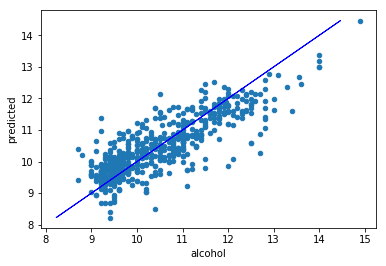

In [15]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='alcohol', y='predicted')
plt.plot(Y_pred_tra, Y_pred_tra, color='blue', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

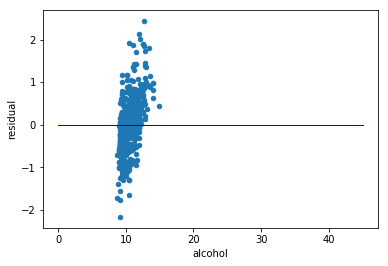

In [16]:
# plot residuals
plt.figure()
df2.plot.scatter(x='alcohol', y='residual')
plt.plot([0,45], [0,0], color='blue', linewidth=1)
plt.show()

## Most important explanatory variables
### we should put the data into normalized format and then test again what the normalized coefficients are
### from normalized coefficients, we then look which ones largest in absolute value
### the actual numeric values seem to change slightly because of randomized data with each run, but with normalized case, the six most important variables should be the same mostly

#### it looks like important explanatory variables are

1. fixed acidicity,
2. citric acid, 
3. residual sugar, 
4. density (strong negative coefficient)
5. ph, 
6. sulphates, 

In [17]:

# normalize variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))

Xn = dfn.iloc[:,0:10]
Yn = dfn.iloc[:,10]
#print(Xn)
#print(Yn)


In [18]:
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)

Standardized variables...
Coefficients: [ 0.8698935   0.06063007  0.15183645  0.3762885  -0.06456756 -0.02103778
 -0.07086721 -1.09340973  0.54505475  0.198317  ]
Intercept: 2.4260385889361853e-14


## attempt to get accuracy measurement for the model

### use the reg.predict into the Y-test data (?), see what comes out for accuracy
#### measurements of accuracy, for regression problems,  include
* R2 score
* mse score

In [19]:

# compute predicted values
Y_pred_test = reg.predict(X_test)
#Y_pred_tra = pd.Series(Y_pred_tra) #put into series form just to be sure

# compute error statistics
mse = mean_squared_error(Y_test, Y_pred_test)
r2s = r2_score(Y_test, Y_pred_test) 
print("MSE = ", mse)
print("R2s = ", r2s)


MSE =  0.37732497868393644
R2s =  0.6603957604845174


### It appears that R2 score is similar, slightly higher (better)with the test data vs train data

### sometimes the test data is worse, but usually when you run program multiple times, then the test data R2 score is better

### MSE was slightly lower in raw terms (better) with the test data vs train data 